In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pylab
from matplotlib import pyplot

In [2]:
# importing the data
raw_csv_data = pd.read_excel("CallCenterData.xlsx")

In [3]:
# check point of data
df_comp = raw_csv_data.copy()

In [4]:
df_comp.tail()

,month,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
127,2020-08-31,20257,4486,1111,212,371,4,3
128,2020-09-30,19207,4474,1020,135,362,3,1
129,2020-10-31,23414,5138,1310,188,523,3,4
130,2020-11-30,23602,4883,1297,199,479,7,1
131,2020-12-31,20058,4150,1118,159,349,4,2


In [5]:
df_comp.describe()

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,9856.704545,2411.856061,514.204545,112.454545,651.681818,2.250000,2.537879
std,6221.071304,1714.759241,392.882978,69.680773,395.949633,1.867255,1.161766
min,631.000000,2.000000,4.000000,2.000000,19.000000,0.000000,1.000000
25%,3744.250000,608.750000,119.000000,39.750000,363.500000,1.000000,1.000000
50%,9651.500000,2613.500000,486.000000,130.500000,581.000000,2.000000,3.000000
75%,15590.750000,4000.500000,901.500000,171.250000,997.750000,3.000000,4.000000
max,23602.000000,5138.000000,1310.000000,229.000000,1535.000000,11.000000,4.000000


In [6]:
df_comp.isna().sum()

month            0
Healthcare       0
Telecom          0
Banking          0
Technology       0
Insurance        0
#ofphonelines    0
#noofchannels    0
dtype: int64

## Setting date as Index

In [7]:
# taken as a date time field
df_comp.month.describe()

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                     132
unique                    132
top       2010-01-31 00:00:00
freq                        1
first     2010-01-31 00:00:00
last      2020-12-31 00:00:00
Name: month, dtype: object

In [8]:
df_comp.set_index("month", inplace=True)

In [9]:
df_comp.head()

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
month,,,,,,,
2010-01-31,631,8,6,2,19,1,4
2010-02-28,633,9,7,3,27,1,3
2010-03-31,766,4,4,2,24,1,1
2010-04-30,768,12,6,3,32,1,1
2010-05-31,1003,2,7,2,42,1,4


In [10]:
# seeting the frequency as monthly
df_comp.asfreq('M')

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
month,,,,,,,
2010-01-31,631,8,6,2,19,1,4
2010-02-28,633,9,7,3,27,1,3
2010-03-31,766,4,4,2,24,1,1
2010-04-30,768,12,6,3,32,1,1
2010-05-31,1003,2,7,2,42,1,4
...,...,...,...,...,...,...,...
2020-08-31,20257,4486,1111,212,371,4,3
2020-09-30,19207,4474,1020,135,362,3,1
2020-10-31,23414,5138,1310,188,523,3,4


In [11]:
# seeting the frequency as monthly
df_comp = df_comp.asfreq('M')

In [12]:
# checking for the null values
df_comp.isna().sum()

Healthcare       0
Telecom          0
Banking          0
Technology       0
Insurance        0
#ofphonelines    0
#noofchannels    0
dtype: int64

## Time Series Visualization

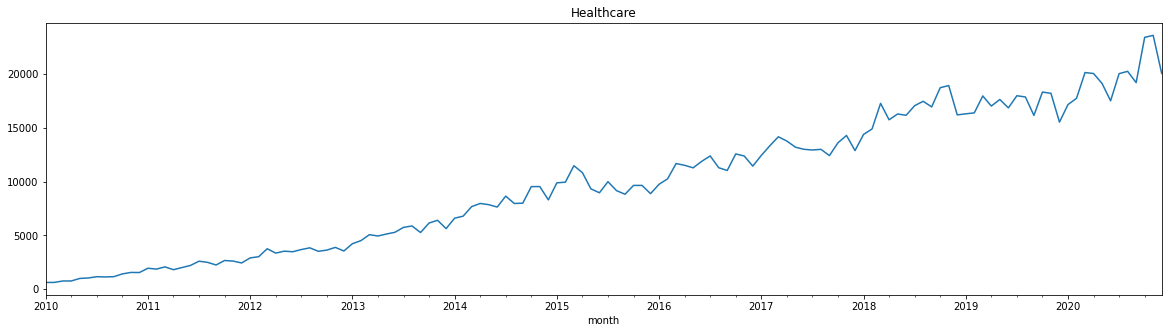

In [13]:
df_comp.Healthcare.plot(figsize=(20,5), title="Healthcare")
plt.show()

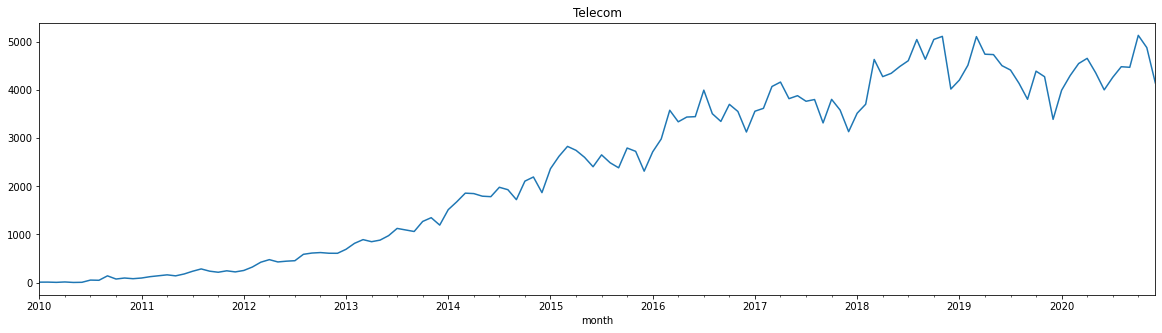

In [14]:
df_comp.Telecom.plot(figsize=(20,5), title="Telecom")
plt.show()

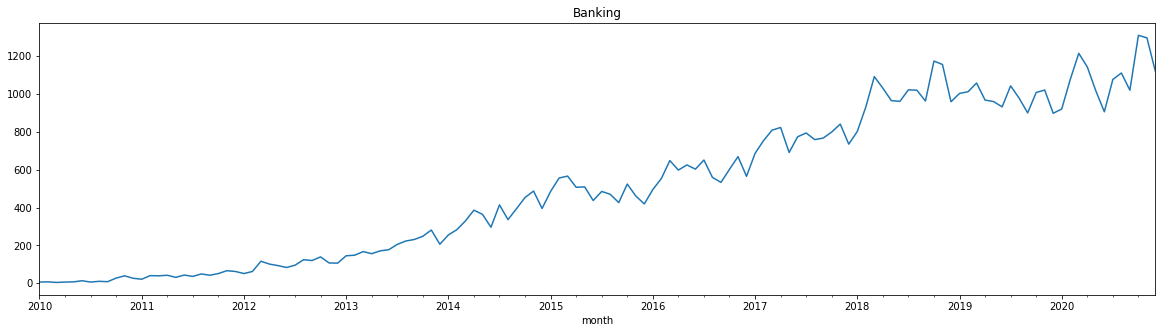

In [15]:
df_comp.Banking.plot(figsize=(20,5), title="Banking")
plt.show()

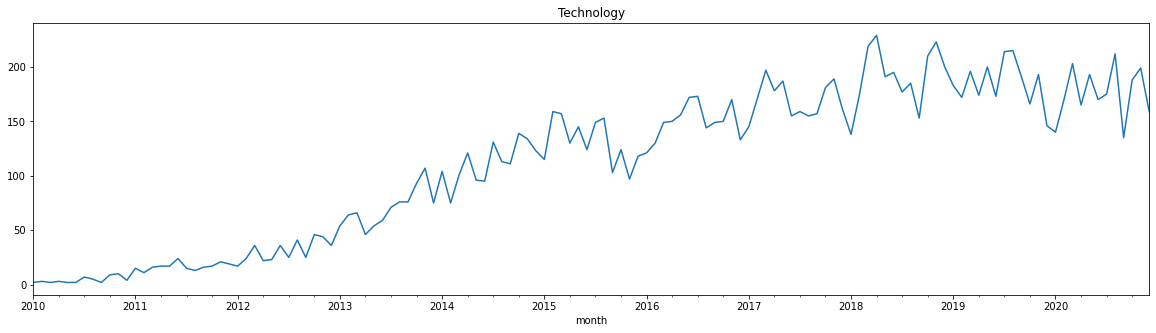

In [16]:
df_comp.Technology.plot(figsize=(20,5), title="Technology")
plt.show()

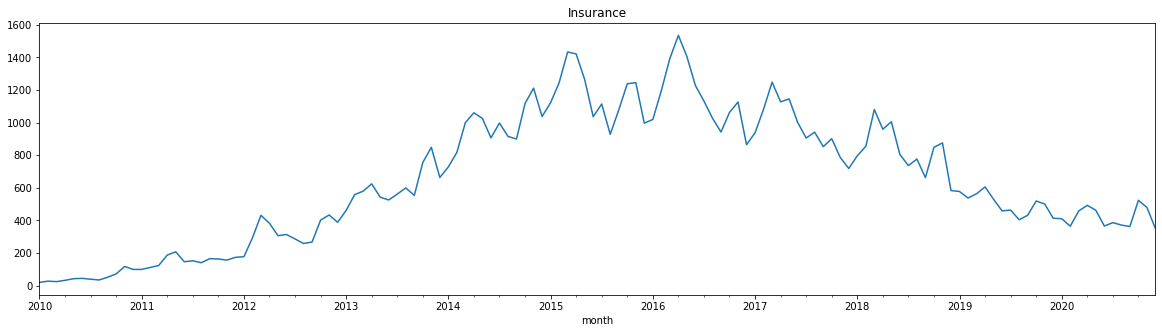

In [17]:
df_comp.Insurance.plot(figsize=(20,5), title="Insurance")
plt.show()

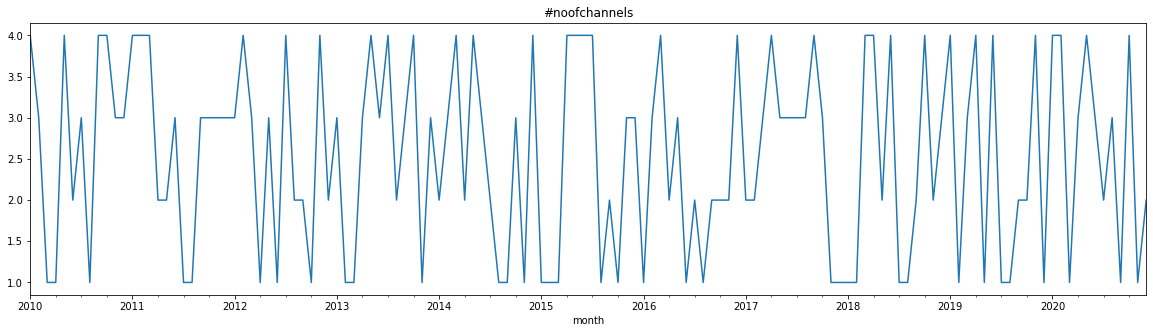

In [18]:
df_comp["#noofchannels"].plot(figsize=(20,5), title="#noofchannels")
plt.show()

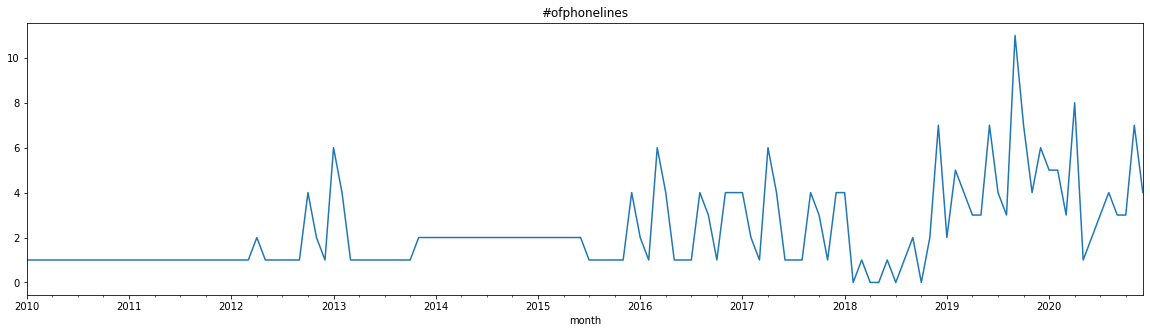

In [19]:
df_comp["#ofphonelines"].plot(figsize=(20,5), title="#ofphonelines")
plt.show()

## Check for normality

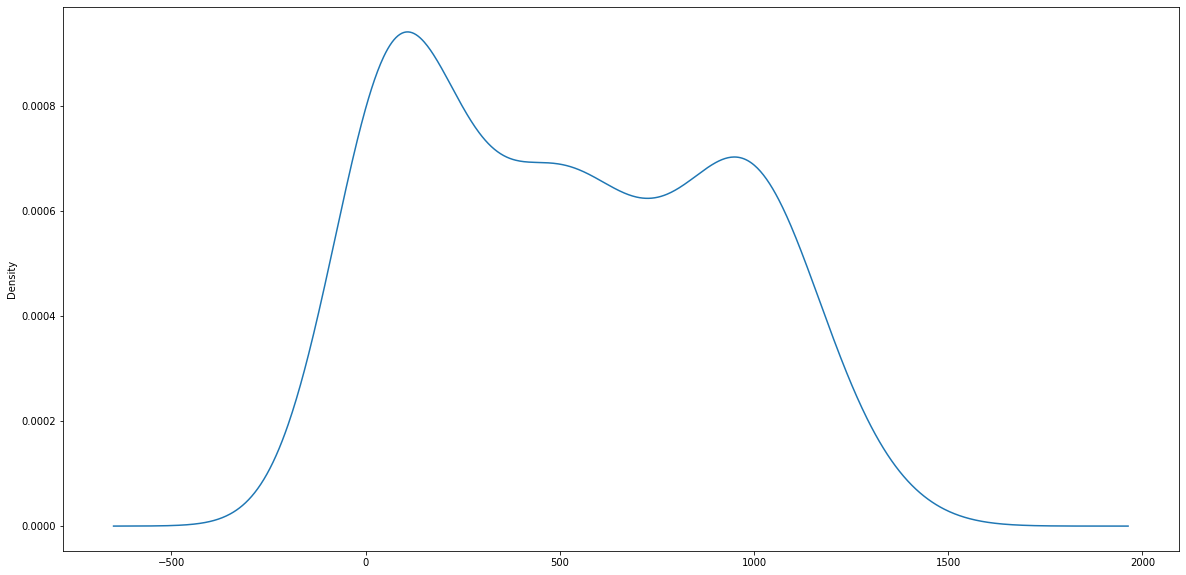

In [20]:
# Density Plots
df_comp["Banking"].plot(kind='kde', figsize=(20, 10))
pyplot.show()

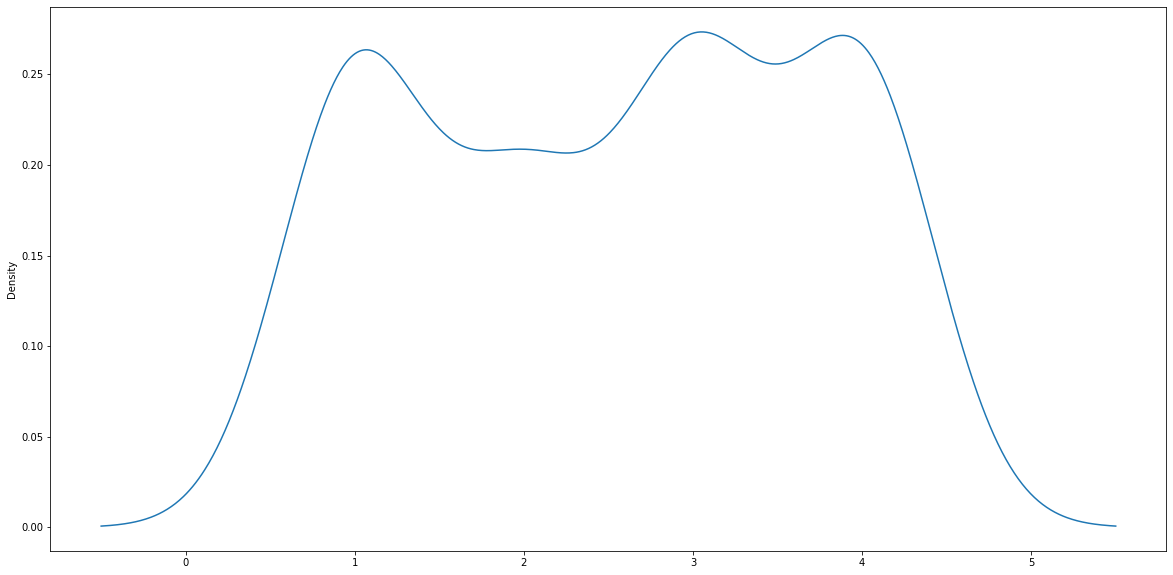

In [21]:
# Density Plots
df_comp["#noofchannels"].plot(kind='kde', figsize=(20, 10))
pyplot.show()

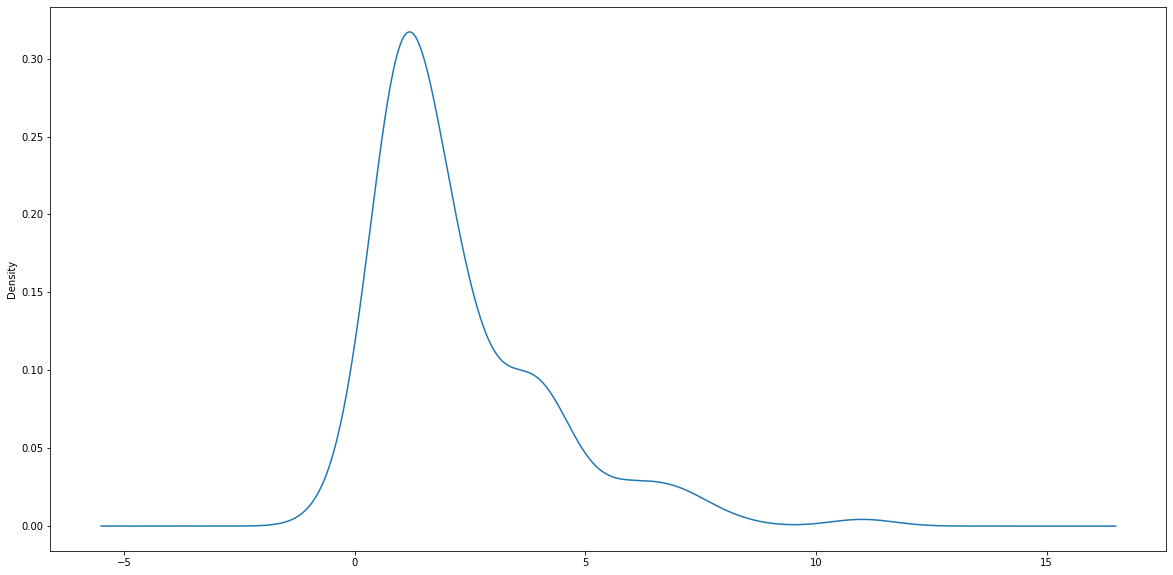

In [22]:
# Density Plots
df_comp["#ofphonelines"].plot(kind='kde', figsize=(20, 10))
pyplot.show()

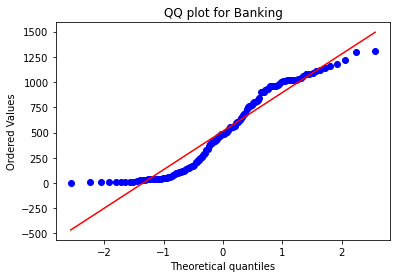

In [23]:
# The QQ plot
scipy.stats.probplot(df_comp["Banking"], plot=pylab)
plt.title("QQ plot for Banking")
pylab.show()

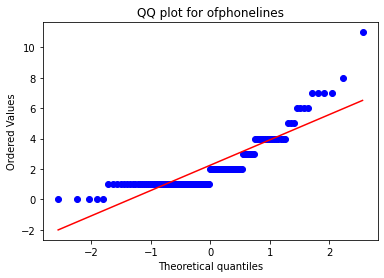

In [24]:
# The QQ plot
scipy.stats.probplot(df_comp["#ofphonelines"], plot=pylab)
plt.title("QQ plot for ofphonelines")
pylab.show()

## Multiple Linear Regressions

In [25]:
df_comp = df_comp[["Banking","#noofchannels", "#ofphonelines"]]

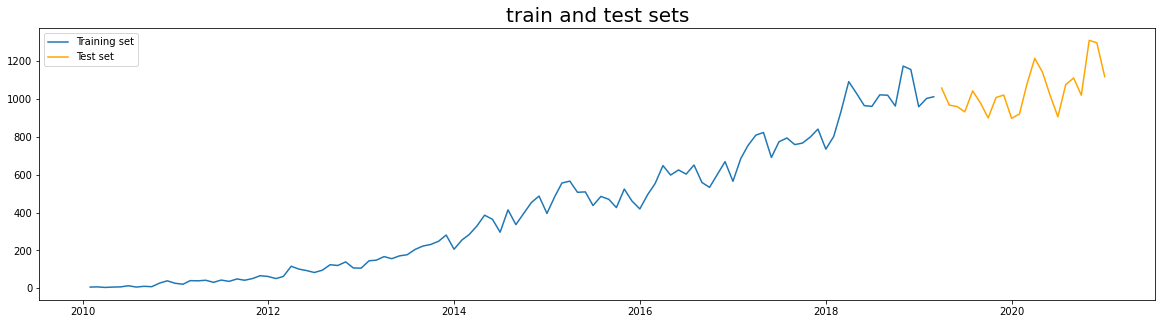

In [27]:
# train set split
test_size = 22

df_train = df_comp[:-test_size]
df_test = df_comp[-test_size:]

plt.figure(figsize=(20,5))
plt.title('train and test sets', size=20)
plt.plot(df_train["Banking"], label='Training set')
plt.plot(df_test["Banking"], label='Test set', color='orange')

plt.legend();

In [28]:
X_train = df_train[["#noofchannels", "#ofphonelines"]].values
y_train = df_train["Banking"].values

X_test = df_test[["#noofchannels", "#ofphonelines"]].values
y_test = df_test["Banking"].values

In [29]:
# train multiple LR
from sklearn.linear_model import LinearRegression
import time 

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

t0 = time.time()
lr_y = y_test
lr_y_fit = lr_model.predict(X_train)
lr_y_pred = lr_model.predict(X_test)
tF = time.time()

print('Time to train = %.2f seconds' % (tF - t0))


Time to train = 0.00 seconds


In [30]:
lr_residuals = lr_y_pred - lr_y

In [31]:
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.2f' % lr_rmse)

RMSE = 503.79


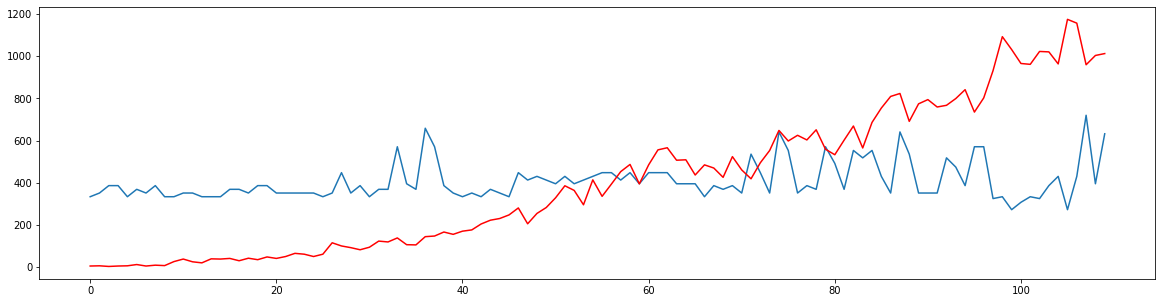

In [32]:
# plot
plt.figure(figsize=(20,5))
plt.plot(lr_y_fit)
plt.plot(y_train, color='red')
plt.show()

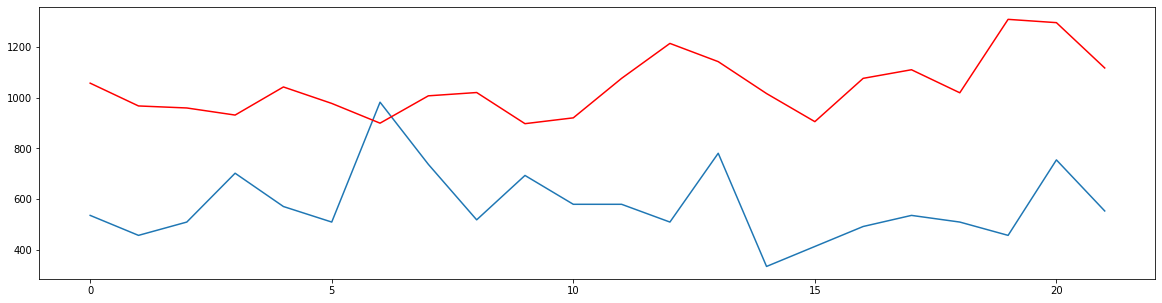

In [33]:
# plot
plt.figure(figsize=(20,5))
plt.plot(lr_y_pred)
plt.plot(lr_y, color='red')
plt.show()

## Residual Analysis

In [34]:
df_comp["delta_1_Banking"] = df_comp.Banking.diff(1)

In [37]:
df_comp.head()

,Banking,#noofchannels,#ofphonelines,delta_1_Banking
month,,,,
2010-01-31,6,4,1,NaN
2010-02-28,7,3,1,1.0
2010-03-31,4,1,1,-3.0
2010-04-30,6,1,1,2.0
2010-05-31,7,4,1,1.0


<AxesSubplot:xlabel='month'>

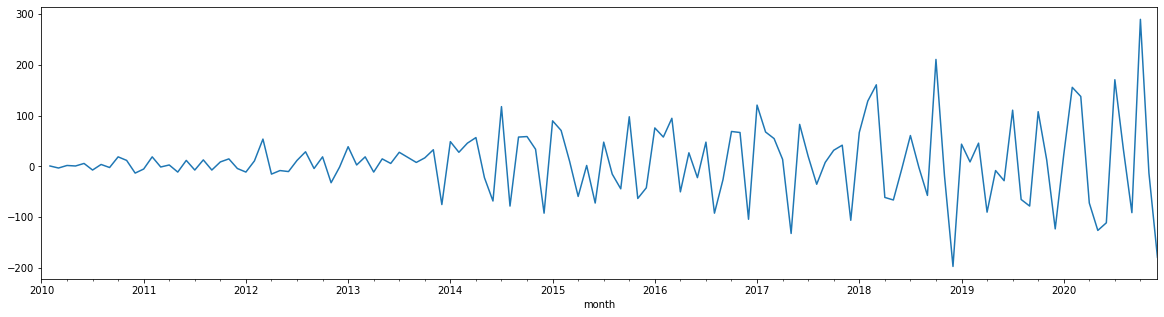

In [35]:
df_comp.delta_1_Banking.plot(figsize=(20,5))

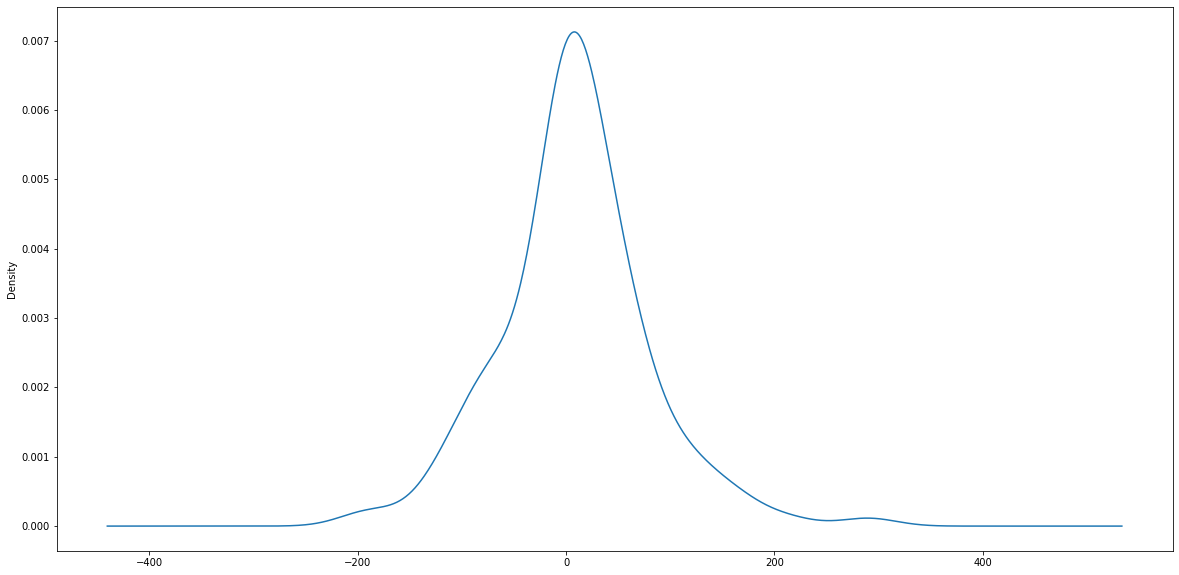

In [38]:
# Checking the normality again with Density Plots
df_comp["delta_1_Banking"].plot(kind='kde', figsize=(20, 10))
pyplot.show()

In [39]:
df_comp["delta_1_noofchannels"] = df_comp["#noofchannels"].diff(1)
df_comp["delta_1_ofphonelines"] = df_comp["#ofphonelines"].diff(1)
# ofphonelines

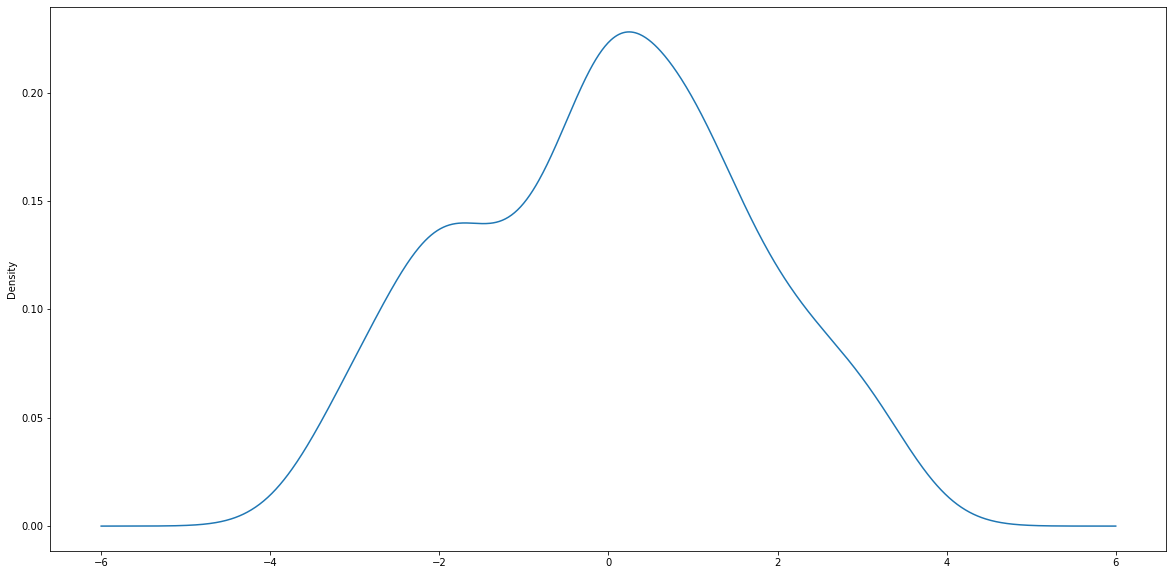

In [40]:
# Density Plots
df_comp["delta_1_noofchannels"].plot(kind='kde', figsize=(20, 10))
pyplot.show()

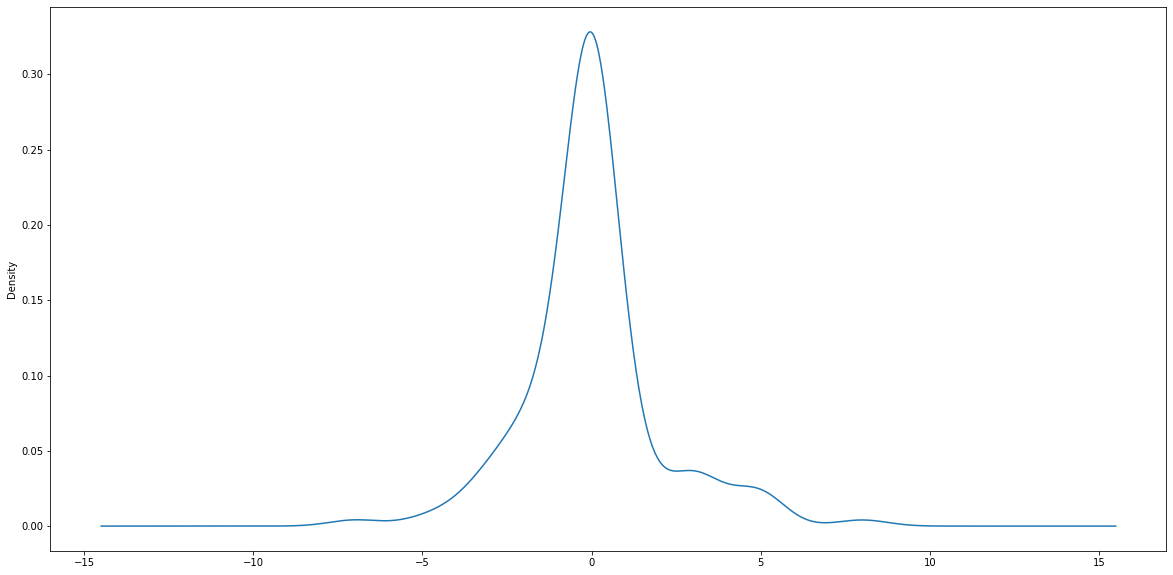

In [41]:
# Density Plots
df_comp["delta_1_ofphonelines"].plot(kind='kde', figsize=(20, 10))
pyplot.show()

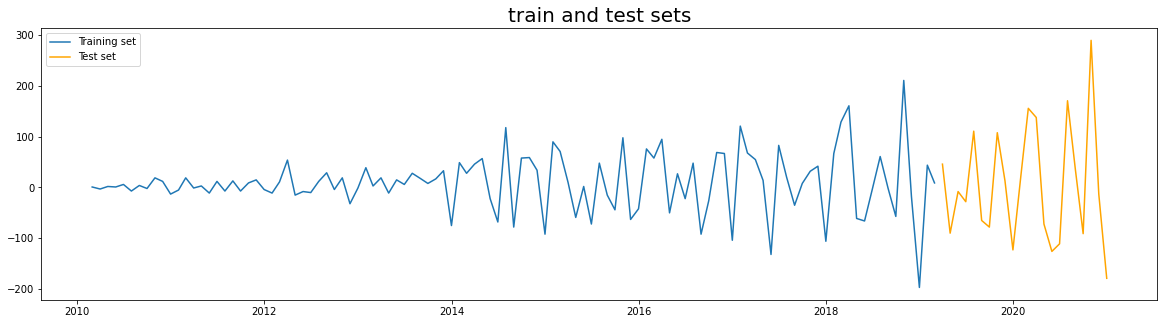

In [42]:
# train set split
test_size = 22

df_train = df_comp[:-test_size]
df_test = df_comp[-test_size:]

plt.figure(figsize=(20,5))
plt.title('train and test sets', size=20)
plt.plot(df_train.delta_1_Banking, label='Training set')
plt.plot(df_test.delta_1_Banking, label='Test set', color='orange')

plt.legend();

In [43]:
X_train = df_train[["delta_1_noofchannels", "delta_1_ofphonelines"]].values[1:]
y_train = df_train["delta_1_Banking"].values[1:]

X_test = df_test[["delta_1_noofchannels", "delta_1_ofphonelines"]].values[1:]
y_test = df_test["delta_1_Banking"].values[1:]

In [44]:
# train multiple LR
from sklearn.linear_model import LinearRegression
import time 

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

t0 = time.time()
lr_y = y_test
lr_y_fit = lr_model.predict(X_train)
lr_y_pred = lr_model.predict(X_test)
tF = time.time()

print('Time to train = %.2f seconds' % (tF - t0))


Time to train = 0.00 seconds


In [ ]:
import pickle
pickle.dump(lr_model, open("./Output/mlr_model.pkl", "wb"))

In [45]:
lr_residuals = lr_y_pred - lr_y

In [46]:
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.2f' % lr_rmse)

RMSE = 118.87


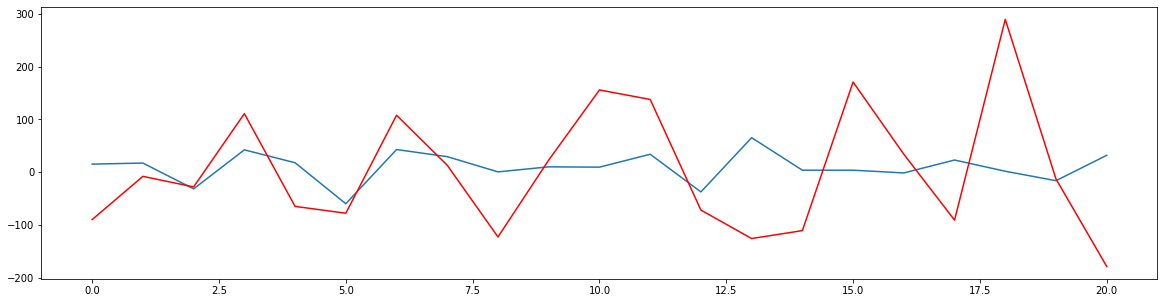

In [47]:
# plot
plt.figure(figsize=(20,5))
plt.plot(lr_y_pred)
plt.plot(lr_y, color='red')
plt.show()

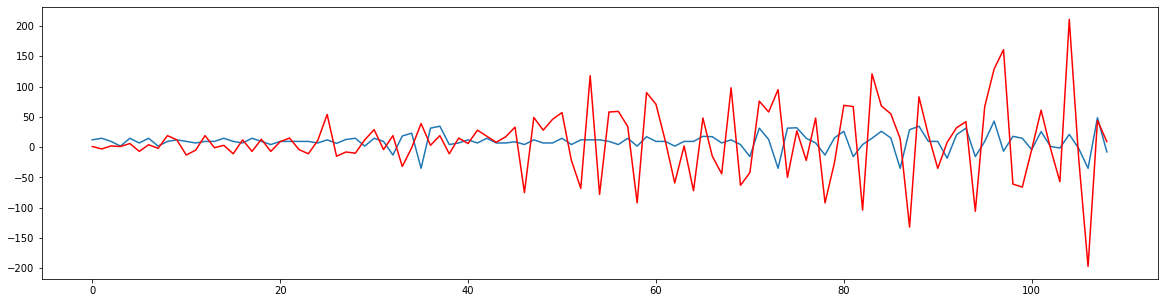

In [48]:
# plot
plt.figure(figsize=(20,5))
plt.plot(lr_y_fit)
plt.plot(y_train, color='red')
plt.show()

In [49]:
df_comp["delta_3_Banking"] = df_comp.Banking.diff(3)
df_comp["delta_3_noofchannels"] = df_comp["#noofchannels"].diff(3)
df_comp["delta_3_ofphonelines"] = df_comp["#ofphonelines"].diff(3)

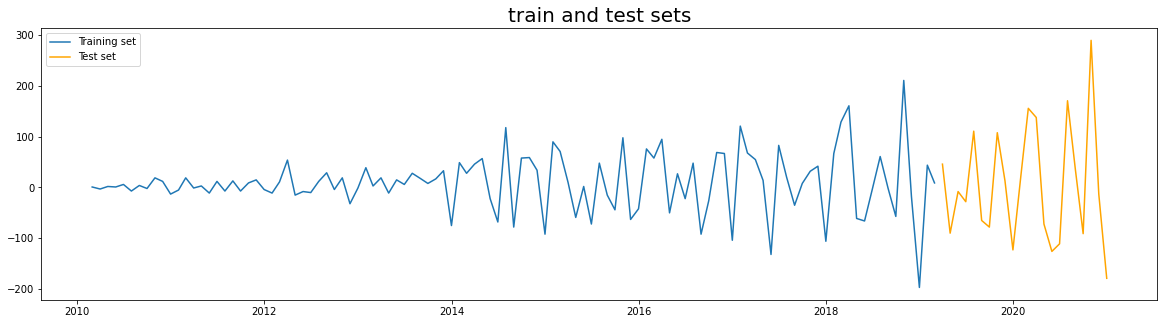

In [50]:
# train set split
test_size = 22

df_train = df_comp[:-test_size]
df_test = df_comp[-test_size:]

plt.figure(figsize=(20,5))
plt.title('train and test sets', size=20)
plt.plot(df_train.delta_1_Banking, label='Training set')
plt.plot(df_test.delta_1_Banking, label='Test set', color='orange')

plt.legend();

In [51]:
X_train = df_train[["delta_3_noofchannels", "delta_3_ofphonelines"]].values[2:]
y_train = df_train["delta_3_Banking"].values[2:]

X_test = df_test[["delta_3_noofchannels", "delta_3_ofphonelines"]].values[2:]
y_test = df_test["delta_3_Banking"].values[2:]

In [52]:
# train multiple LR
from sklearn.linear_model import LinearRegression
import time 

lr_model = LinearRegression()
lr_model.fit(X_train[3:], y_train[3:])

t0 = time.time()
lr_y = y_test[3:]
lr_y_fit = lr_model.predict(X_train[3:])
lr_y_pred = lr_model.predict(X_test[3:])
tF = time.time()

print('Time to train = %.2f seconds' % (tF - t0))

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.2f' % lr_rmse)

Time to train = 0.00 seconds
RMSE = 157.63


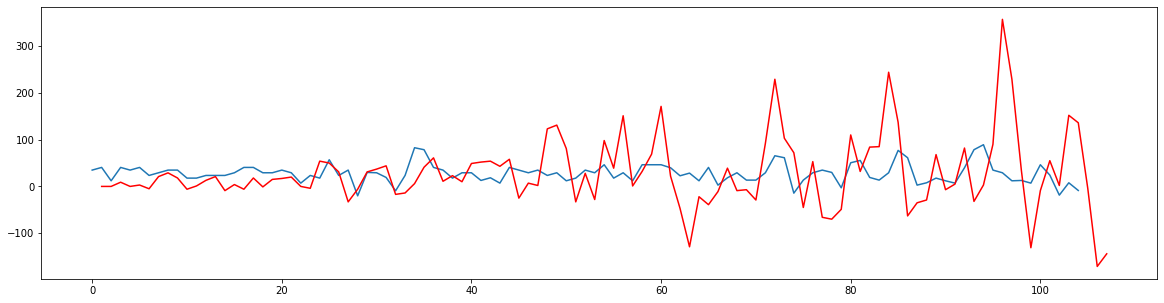

In [53]:
# plot
plt.figure(figsize=(20,5))
plt.plot(lr_y_fit)
plt.plot(y_train, color='red')
plt.show()

## SymbolicRegressor

In [54]:
#######################
# CREATION OF THE MODEL
#######################

import gplearn as gpl        
from gplearn.genetic import SymbolicRegressor

# It is possible to create custom operations to be considered in the tree
def _xexp( x ):
    a = np.exp(x); 
    a[ np.abs(a) > 1e+9 ] = 1e+9
    return a    

In [55]:

xexp = gpl.functions.make_function( function = _xexp, name='xexp', arity=1 )
function_set = ['add', 'sub', 'mul', 'div', 'sin', 'log' , xexp]
# function_set = ['add', 'sub', 'mul', 'div']



In [56]:
if 'model' in locals(): del model
model = SymbolicRegressor(population_size = 1000, tournament_size=5,
                          generations = 25, stopping_criteria=0.1,
                          function_set = function_set, metric='rmse',
                          p_crossover=0.65, p_subtree_mutation=0.15,
                          p_hoist_mutation=0.05, p_point_mutation=0.1,
                          verbose = 1, random_state = None, n_jobs = -1)



In [57]:
X_train = df_train[["delta_1_noofchannels", "delta_1_ofphonelines"]].values[1:]
y_train = df_train["delta_1_Banking"].values[1:]

X_test = df_test[["delta_1_noofchannels", "delta_1_ofphonelines"]].values[1:]
y_test = df_test["delta_1_Banking"].values[1:]

In [58]:
###########################################################
# TRAIN THE NETWORK AND PREDICT - Without previous values y
###########################################################

# Train
t0 = time.time()
model.fit(X_train, y_train)
tF = time.time()

# Predict
sr_y_fit = model.predict(X_train).reshape(-1,1)
sr_y_pred = model.predict(X_test).reshape(-1,1)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    17.01      2.92153e+08       42           57.382              N/A      1.49m
   1    12.98      4.45555e+06       27          57.1391              N/A     47.60s
   2    14.17      6.46091e+06       11          56.4377              N/A     55.53s
   3    16.52      1.09698e+07       24          56.3506              N/A      1.09m
   4    21.41      1.03618e+07       43           55.612              N/A      1.55m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

   5    27.35      1.00854e+07       31          54.9397              N/A      2.41m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

   6    31.20      7.26947e+06       79          55.3228              N/A      3.79m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

   7    36.11      8.01249e+06       48          54.8436              N/A      3.49m
   8    41.31       1.4078e+07       49          54.7161              N/A      3.90m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

   9    48.38      1.17281e+07       38           54.443              N/A      4.44m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  10    54.26      2.35221e+07       76          54.2245              N/A      3.45m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  11    61.00      2.68512e+08       46          54.1298              N/A      3.71m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  12    68.36      5.29638e+07       74          53.7246              N/A      3.95m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipyke

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  13    70.84      4.77323e+07       39          53.2095              N/A      4.17m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  14    75.83      2.48285e+07      122          53.6564              N/A      5.00m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  15    82.90      2.46406e+07      128          53.5431              N/A      4.18m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  16    91.60       5.7828e+06      130          52.8251              N/A      3.88m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipyke

  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipyke

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  17   107.36      3.00791e+07      130          52.8251              N/A      3.91m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  18   121.36       7.6421e+12      130          52.8251              N/A      3.82m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  19   135.10      5.11638e+06      164           52.493              N/A      4.01m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  20   144.90      1.65619e+07      113            52.33              N/A      3.58m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipyke

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  21   155.00      4.75127e+06      127          52.3007              N/A      2.51m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipyke

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipyke

  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipyke

  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipyke

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  22   164.07      7.37163e+06      488          51.4034              N/A      1.82m


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipyke

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipyke

  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipyke

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipyke

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  23   184.77      1.63548e+07      485          50.7251              N/A     57.17s


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipyke

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipyke

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

  24   208.95      2.89116e+07      471          50.7226              N/A      0.00s


/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


In [59]:
# Calculating Errors
sr_residuals = sr_y_pred - y_test
sr_rmse = np.sqrt(np.sum(np.power(sr_residuals,2)) / len(sr_residuals))
print('RMSE = %f' % sr_rmse)
print('Time to train %.2f' % (tF - t0))
print(model._program)

RMSE = 584.118105
Time to train 652.51
add(sub(-0.015, sub(add(X1, X0), add(xexp(div(X0, X1)), xexp(mul(-0.640, X1))))), add(mul(xexp(sin(sin(xexp(mul(X0, X1))))), sub(div(div(log(div(mul(sin(xexp(add(X0, 0.370))), xexp(X1)), div(mul(xexp(sin(div(mul(xexp(sin(sin(xexp(div(mul(xexp(sin(xexp(div(X0, X1)))), sub(add(add(xexp(div(X0, X1)), xexp(sin(log(X0)))), xexp(div(X0, X1))), mul(add(X0, X0), mul(xexp(div(sub(add(X1, X0), log(X1)), X1)), div(X0, div(div(mul(-0.640, X1), xexp(sin(sin(xexp(mul(X0, X1)))))), 0.046)))))), xexp(log(0.864))))))), sub(add(add(xexp(div(X0, X1)), div(X1, -0.157)), xexp(mul(-0.640, X1))), mul(add(X0, X0), mul(xexp(sin(X0)), div(X0, div(div(mul(-0.640, X1), 0.186), 0.046)))))), xexp(log(0.864))))), sub(add(xexp(div(X0, X1)), xexp(mul(-0.640, X1))), mul(X1, div(X0, add(X0, X0))))), xexp(xexp(div(add(log(add(xexp(div(X0, X1)), xexp(0.834))), div(-0.977, 0.226)), log(mul(0.996, X0)))))))), log(xexp(-0.097))), xexp(xexp(div(add(sub(0.194, X1), div(-0.977, X1)), add(a

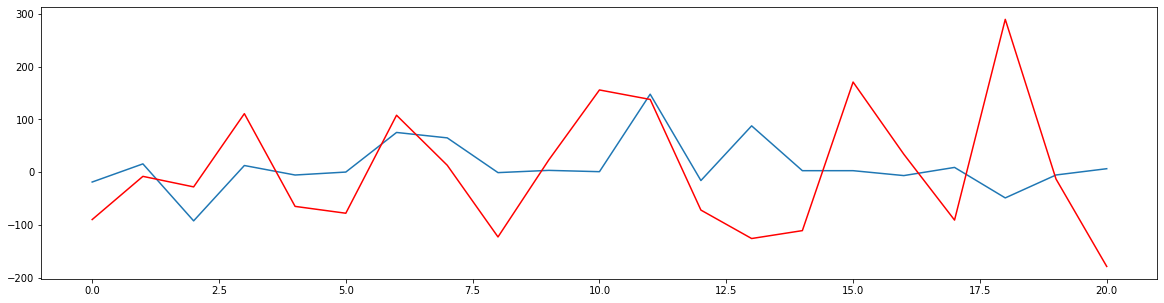

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/Users/nihitsaxena/DataStunt/Desyre/TimeSeries/p4/multipleLR/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encounte

In [60]:
# plot
plt.figure(figsize=(20,5))
plt.plot(sr_y_pred)
plt.plot(y_test, color='red')
plt.show()